## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZEs = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for BATCH_SIZE in BATCH_SIZEs:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Batch size = %.6f " % (BATCH_SIZE))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"] 
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch-size-%s" % (str(BATCH_SIZE))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0719 23:30:14.136485 140584288921408 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0719 23:30:14.140396 140584288921408 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 23:30:14.168427 140584288921408 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 23:30:14.169408 140584288921408 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The n

Experiment with Batch size = 2.000000 


W0719 23:30:14.387310 140584288921408 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 23:30:14.465906 140584288921408 deprecation.py:323] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 353s 7ms/step - loss: 2.2058 - acc: 0.1805 - val_loss: 3.5524 - val_acc: 0.2304
Epoch 50/50
50000/50000 [==============================] - 350s 7ms/step - loss: 2.1989 - acc: 0.1846 - val_loss: 3.5625 - val_acc: 0.2275
Experiment with Batch size = 16.000000 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None

50000/50000 [==============================] - 46s 930us/step - loss: 1.1489 - acc: 0.5923 - val_loss: 1.3608 - val_acc: 0.5240
Epoch 48/50
50000/50000 [==============================] - 47s 930us/step - loss: 1.1435 - acc: 0.5936 - val_loss: 1.4264 - val_acc: 0.5046
Epoch 49/50
50000/50000 [==============================] - 46s 928us/step - loss: 1.1517 - acc: 0.5905 - val_loss: 1.3269 - val_acc: 0.5338
Epoch 50/50
50000/50000 [==============================] - 46s 929us/step - loss: 1.1586 - acc: 0.5897 - val_loss: 1.3903 - val_acc: 0.5168
Experiment with Batch size = 32.000000 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalizat

50000/50000 [==============================] - 26s 525us/step - loss: 0.9020 - acc: 0.6776 - val_loss: 1.4677 - val_acc: 0.5150
Epoch 46/50
50000/50000 [==============================] - 27s 530us/step - loss: 0.8934 - acc: 0.6797 - val_loss: 1.4794 - val_acc: 0.5148
Epoch 47/50
50000/50000 [==============================] - 26s 529us/step - loss: 0.8954 - acc: 0.6799 - val_loss: 1.5059 - val_acc: 0.5091
Epoch 48/50
50000/50000 [==============================] - 26s 525us/step - loss: 0.8890 - acc: 0.6808 - val_loss: 1.4819 - val_acc: 0.5217
Epoch 49/50
50000/50000 [==============================] - 26s 525us/step - loss: 0.8801 - acc: 0.6836 - val_loss: 1.7051 - val_acc: 0.4883
Epoch 50/50
50000/50000 [==============================] - 26s 524us/step - loss: 0.8779 - acc: 0.6830 - val_loss: 1.4878 - val_acc: 0.5170
Experiment with Batch size = 128.000000 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

50000/50000 [==============================] - 10s 199us/step - loss: 0.4503 - acc: 0.8375 - val_loss: 2.1066 - val_acc: 0.4990
Epoch 44/50
50000/50000 [==============================] - 10s 198us/step - loss: 0.4364 - acc: 0.8435 - val_loss: 2.2921 - val_acc: 0.4693
Epoch 45/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.4230 - acc: 0.8493 - val_loss: 2.2602 - val_acc: 0.4923
Epoch 46/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.4209 - acc: 0.8479 - val_loss: 2.2298 - val_acc: 0.4956
Epoch 47/50
50000/50000 [==============================] - 10s 198us/step - loss: 0.4095 - acc: 0.8524 - val_loss: 2.3720 - val_acc: 0.4818
Epoch 48/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.4060 - acc: 0.8533 - val_loss: 2.3247 - val_acc: 0.4780
Epoch 49/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.3925 - acc: 0.8559 - val_loss: 2.2378 - val_acc: 0.4835
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 8s 156us/step - loss: 0.3167 - acc: 0.8891 - val_loss: 2.5778 - val_acc: 0.4727
Epoch 42/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.3076 - acc: 0.8917 - val_loss: 2.6673 - val_acc: 0.4664
Epoch 43/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.2990 - acc: 0.8934 - val_loss: 2.6541 - val_acc: 0.4606
Epoch 44/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.2902 - acc: 0.8979 - val_loss: 2.6639 - val_acc: 0.4685
Epoch 45/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.2790 - acc: 0.9020 - val_loss: 2.6724 - val_acc: 0.4757
Epoch 46/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.2652 - acc: 0.9072 - val_loss: 3.2502 - val_acc: 0.4554
Epoch 47/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.2616 - acc: 0.9084 - val_loss: 2.6814 - val_acc: 0.4683
Epoch 48/50
50000/50000 [==============

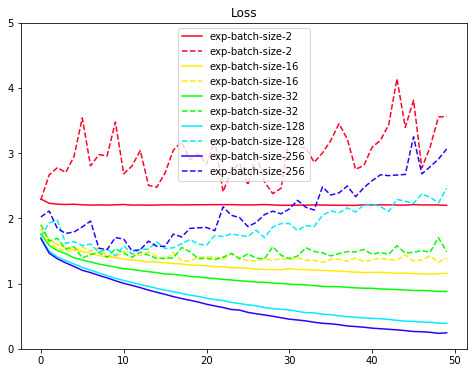

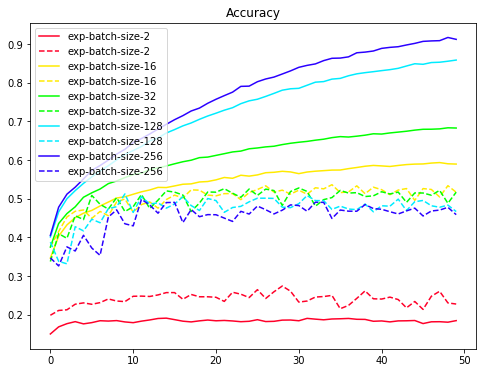

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()